In [1]:
using Plots, IJulia

I started with a PINN implementation using Flux and Zygote, but it was extremely slow (approx 1 batch every 3 seconds). It took over an hour to converge on my pc. I did some reading on forums, and Lux seems like a better platform from what I read.

The first Lux model. 3 hidden layers with 64 neurons, tanh activation. λ_pde = 3.0, λ_ic = 1.0, λ_bc = 1.0.
Used the standard burgers PDE with the second order derivative, used only BC and IC as data. Adam(0.005), 10k batches, batch_size_pde = 64, batch_size_bc = 32, batch_size_ic = 32. ν = 0.1.

Loss converges well, and fast, we probably dont even need anywhere close to 10k batches. Initial condition is captured well, error in boundary is pretty small, but could be better, NN seems like it has too much diffusion somehow.

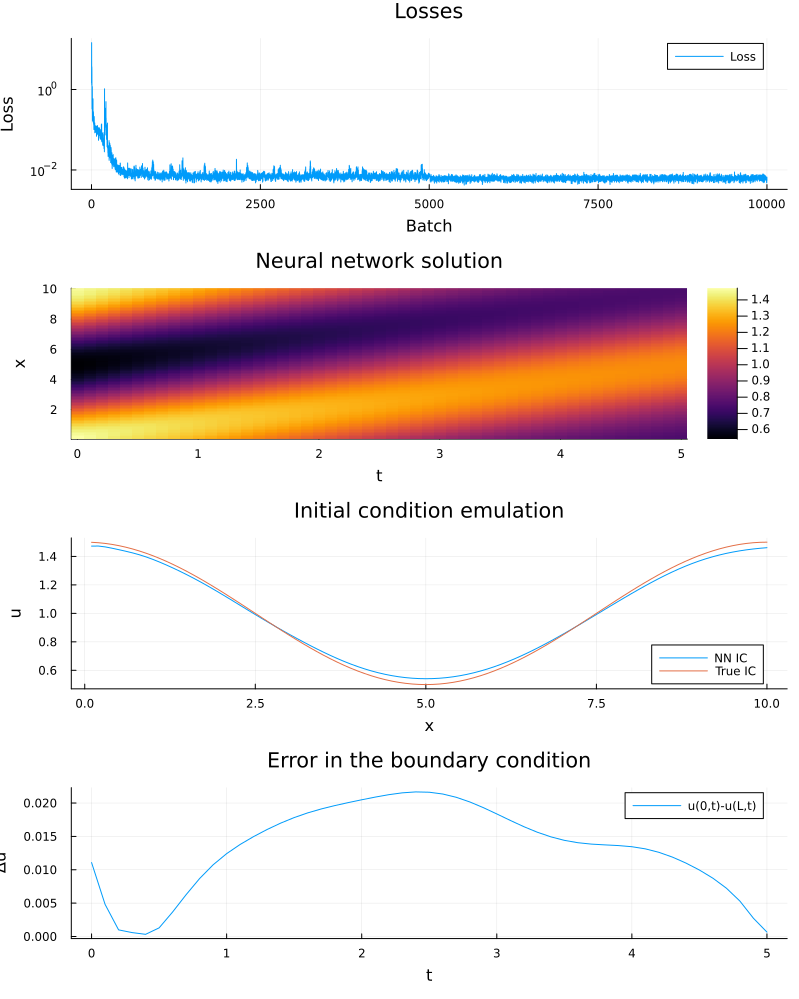

In [2]:
display("image/png", read("media/Lux_init_plots.png"))

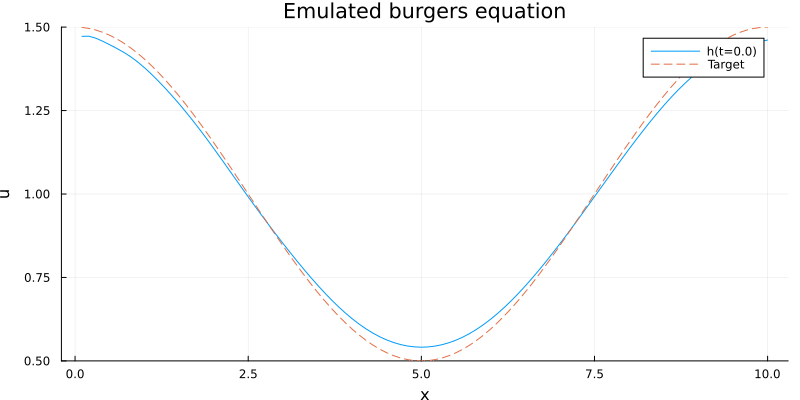

In [3]:
display("image/gif", read("media/Lux_model_initial.gif"))

Would this solution correspond to a higher viscosity? 

Here with a target solution at ν = 0.4.
Seems more alike, but still some qualitative differences, the NN solution should diffuse more.

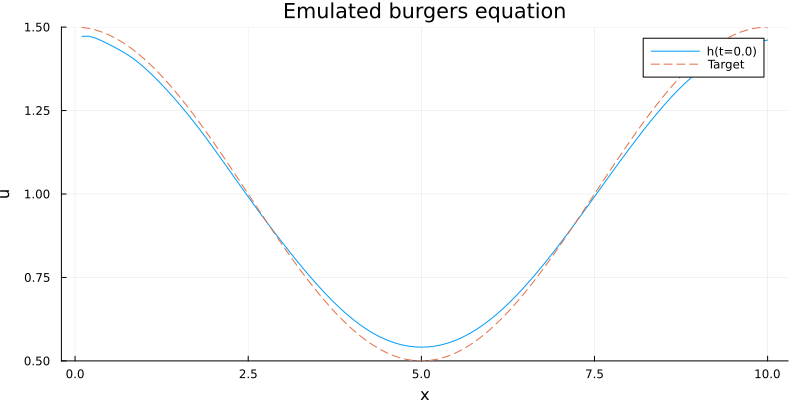

In [7]:
display("image/gif", read("media/Lux_model_initial_higher_visc.gif"))

Here I rerun but with a timespan of t_end = 30. The rest of the settings are the same (showing the ODE solution at ν = 0.1).

Interesting results, the initial condition seems to be met very well, loss is more noisy, but most importently the NN does not seem to capture the wave-like diffusion that well, goes flat too fast.


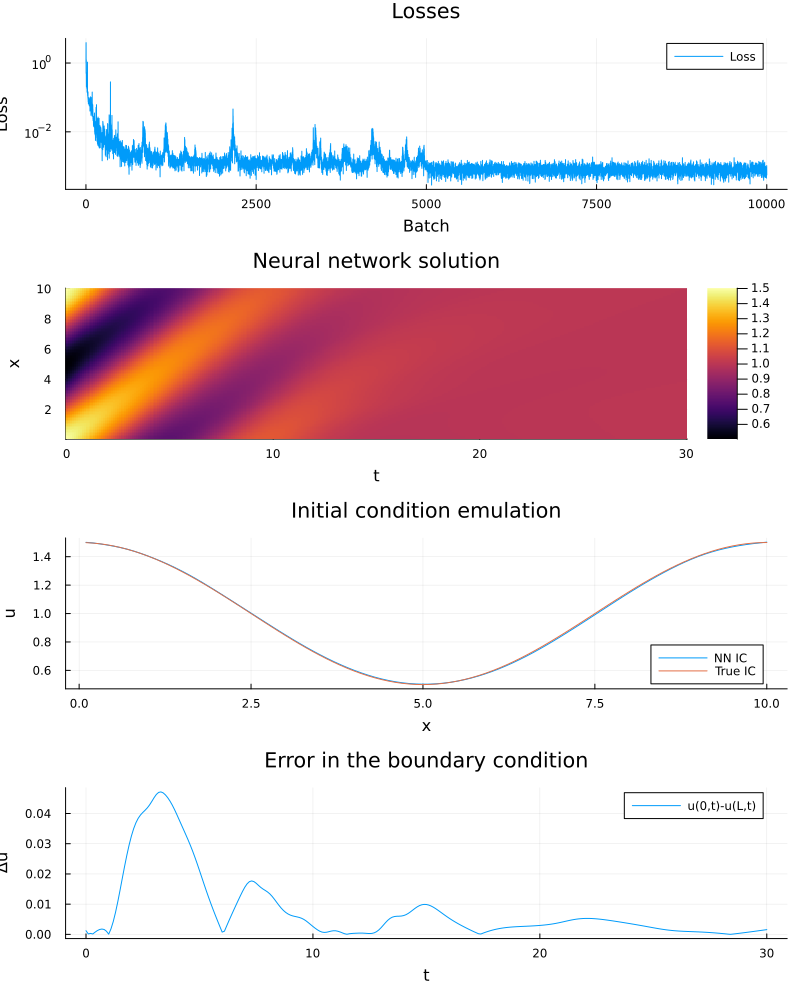

In [8]:
display("image/png", read("media/Longer_timespan.png"))

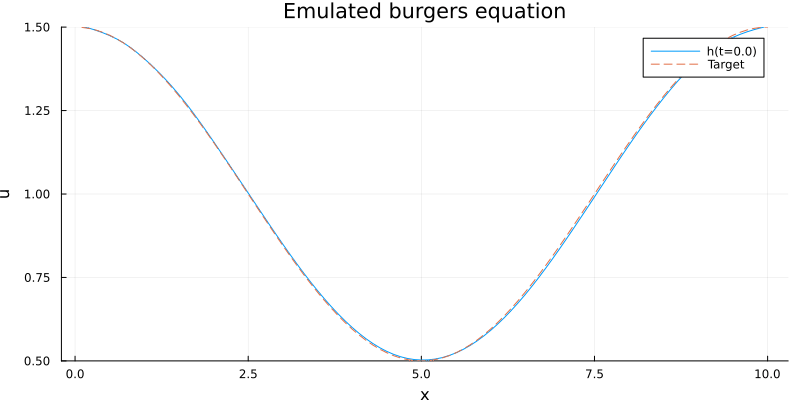

In [9]:
display("image/gif", read("media/Longer_timespan.gif"))

I think a good next step is to try a curriculum training approach. I will split the timespan up into 10 segments, and let the model train on the segments separately.

Well... the loss is a lot lower than before, but it completely ignored the initial condition. (I think I also did the curriculum learning incorrectly, which I corrected later, but it showed not improvement from training without curriculum)

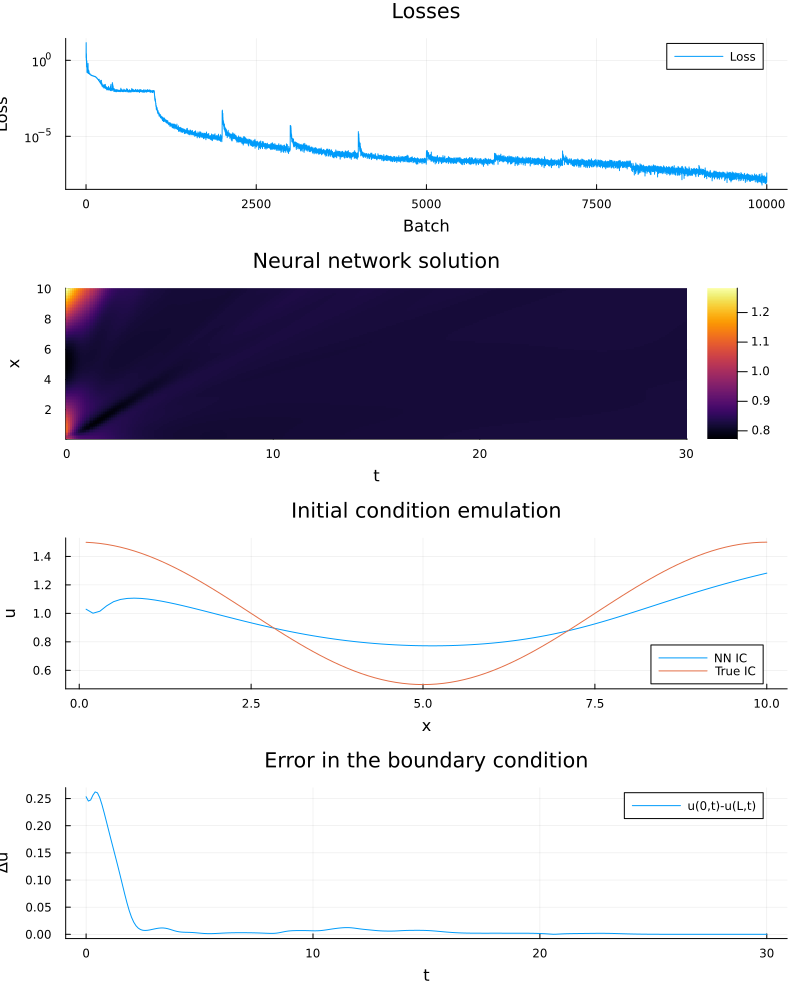

In [10]:
display("image/png", read("media/first_curriculum.png"))

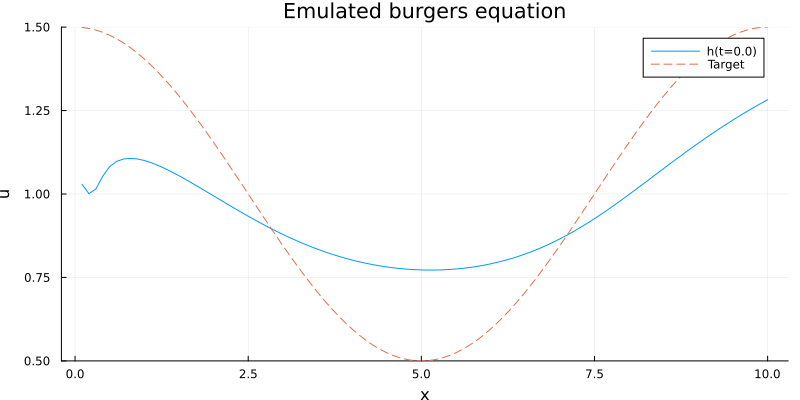

In [11]:
display("image/gif", read("media/first_curriculum.gif"))

I will now try to include IC information into every segment.

Grrr, it now captures the IC well, but it found out that it can temporarily ignore the physics and BC so that it can achieve very low loss for the rest of the domain.

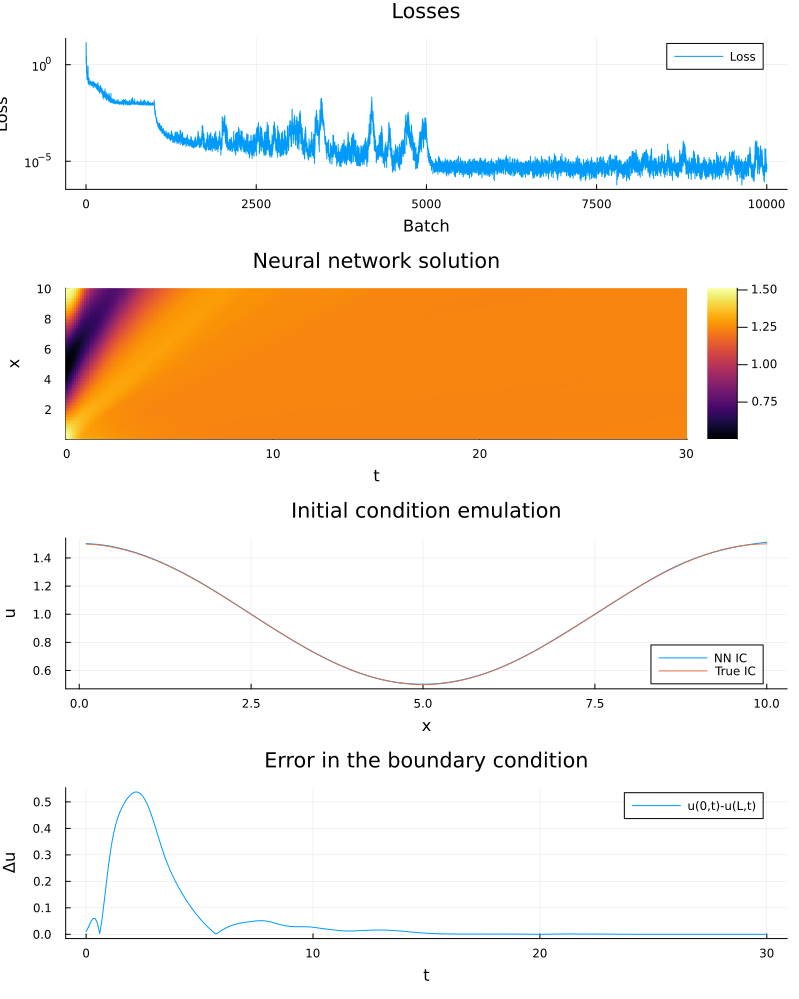

In [12]:
display("image/png", read("media/curriculum_with_ic.png"))

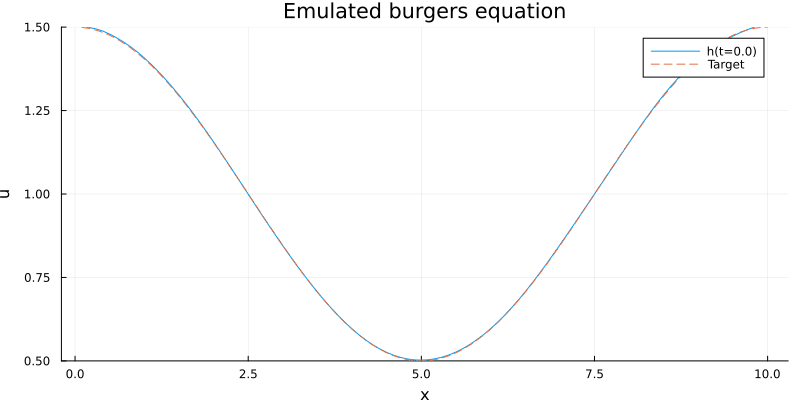

In [13]:
display("image/gif", read("media/curriculum_with_ic.gif"))

I wanted to try and see if the non linear advection term was the problem for our NN, so I trained on a purely diffusive case.

Here we can see that we achieve a much lower loss. I would also say that the final solution looks more like the target than before, but notably, the network seems to struggle with places where u is large, as it seems to diffuse too much. In recent tests, I can also note that the loss does not actually converge, at some point it just goes down very very slowely, which suggests the optimizer is not working as well as I hoped.

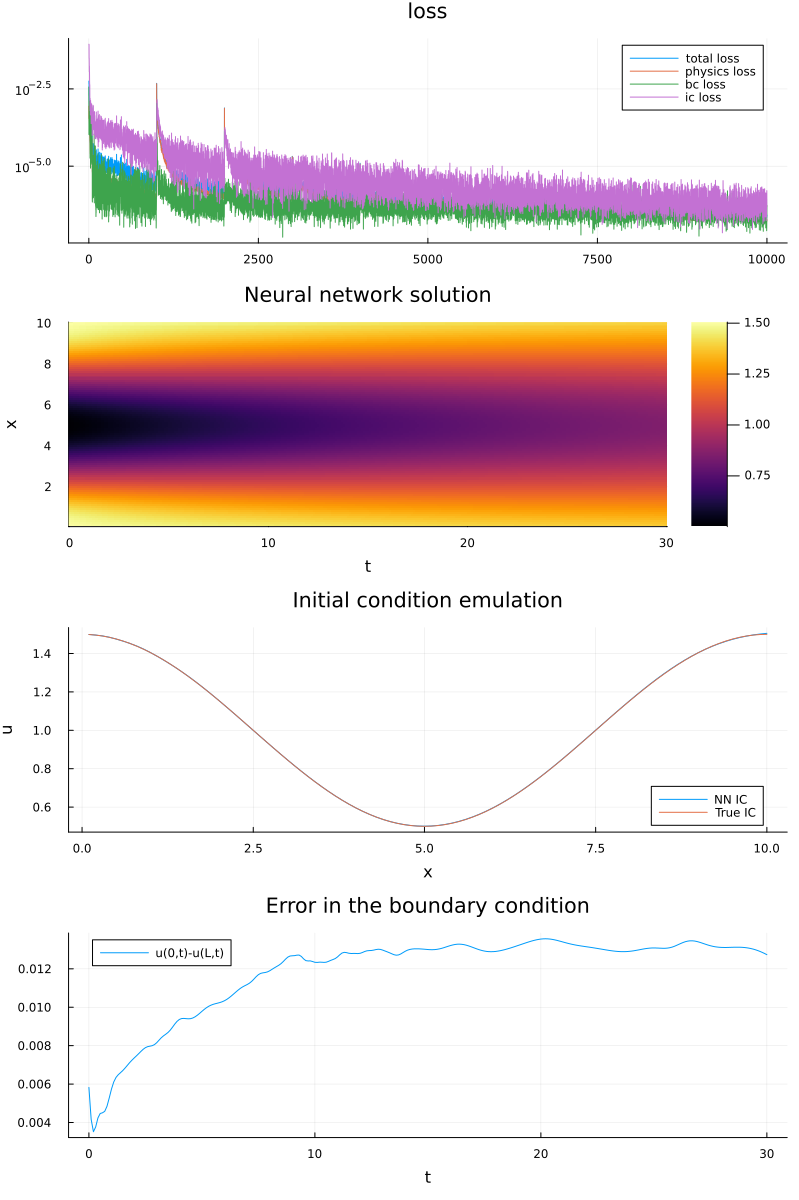

In [1]:
display("image/png", read("media/pure_diffusion.png"))

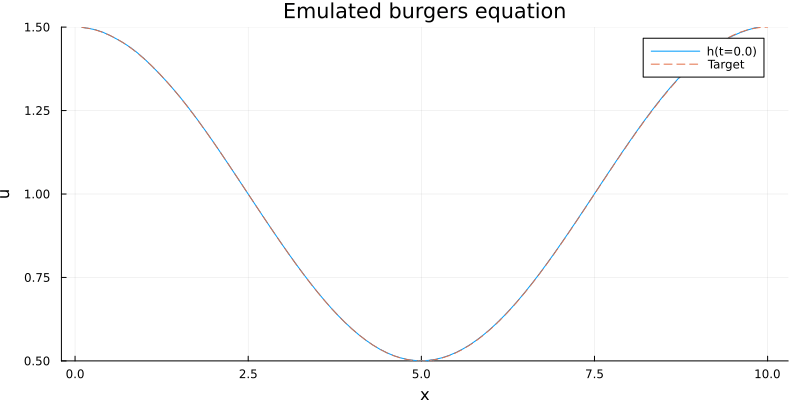

In [2]:
display("image/gif", read("media/pure_diffusion.gif"))

In almost all PINN papers, BFGS is mentioned as being a far superior optimizer for PINNs. I will try to get that to work for my case, but I think I need some workaround, because it doesnt fit into my current code structure.